In [1]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image
import os
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt

2022-11-23 19:12:52.909922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-23 19:12:53.029628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-23 19:12:53.029651: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-23 19:12:53.072487: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-23 19:12:53.729151: W tensorflow/stream_executor/platform/de

In [2]:

#     classes = {'daisy':0, 'dandelion':1, 'rose':2}
#     imgs = []
#     labels = []
#     for (cl, i) in classes.items():
#         images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
#         for img in tqdm(images_path[:300]):
#             path = os.path.join(data_path, cl, img)
#             if os.path.exists(path):
#                 image = Image.open(path)
#                 image = image.resize((256, 256))
#                 imgs.append(np.array(image))
#                 labels.append(i)

#     X = np.array(imgs)
#     num_classes = len(set(labels))
#     y = to_categorical(labels, num_classes)

#     # Finally we shuffle:
#     p = np.random.permutation(len(X))
#     X, y = X[p], y[p]

#     first_split = int(len(imgs) /6.)
#     second_split = first_split + int(len(imgs) * 0.2)
#     X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
#     y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
#     return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [3]:
dataframe=[]

 
# get the path/directory
folder_dir = "images/"
for images in os.listdir(folder_dir):
    try:
        yeet = []
        path = os.path.join(folder_dir, images)
        print(path)
        image = Image.open(path)
        yeet.append(images.replace(".png", ""))
        arr = np.array(image)
        A,B,C = arr.shape
        if C == 4:
            arr = arr[:,:,:3]
        
        yeet.append(arr)
        dataframe.append(yeet)
    except:
        print("end")
    

FileNotFoundError: [Errno 2] No such file or directory: 'images/'

In [ ]:
len(dataframe)

In [ ]:
path = os.path.join(folder_dir, "nu260w.png")
print(path)
image = Image.open(path)
x = np.array(image)
A, B, C =x.shape
if C ==4:
    print("Hey!")
x = x[:,:,:3]
plt.imshow(x)

In [ ]:
only_im_arr = []

for im in dataframe:
    only_im_arr.append(im[1])
only_im_arr

In [ ]:
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(dataframe[i][1])

In [ ]:
data_arrys =pd.DataFrame(dataframe)


In [ ]:
data_arrys.rename(columns={0 :'id', 1:"image_arrys"}, inplace=True)
data_arrys

In [ ]:
data_1 = pd.read_csv('data_with_size.csv', index_col=0)

In [ ]:
data = data_1[data_1["size"]!=-1]
data

In [ ]:
final_data = pd.merge(data, data_arrys)

In [ ]:
final_data

In [ ]:
final_data["y_cat"] = final_data["upvotes"].apply(lambda x: 1 if x>39 else 0)

In [ ]:
final_data

In [ ]:
y = np.asarray(final_data["y_cat"])
X = np.asarray(final_data["image_arrys"].tolist())

In [ ]:
X_train = X[:6000]
X_val = X[6000:]

y_train = y[:6000]
y_val = y[6000:]
print(X_train.shape, y_train.shape)

In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_own_model():

    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(128,128,3)))

    model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    model.add(layers.MaxPooling2D(3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    opt = optimizers.Adam(learning_rate=1e-2)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [ ]:
from tensorflow.keras import layers, models

def initialize_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(16, kernel_size=(4, 4), padding = "same", 
                            activation='relu', input_shape=(128,128,3)))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(32, kernel_size=(3, 3),
                            activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(64, kernel_size=(3, 3), 
                            activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, kernel_size=(3, 3), 
                            activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation = "relu"))
    
    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(1, activation="sigmoid"))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])    
    
    return model

In [ ]:
model_homemade = initialize_model()
model_homemade.summary()

In [ ]:
type(y)

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)
# learningrate scheduler keras use it to control the learning rate, average pooling regularization, optimizer


history = model_homemade.fit(X_train, y_train,
                             validation_data = (X_val, y_val),
                             batch_size = 32, 
                             epochs = 100, 
                             callbacks=[es])

In [ ]:
final_data["y_cat"].sum()

In [ ]:
final_data["y_cat"].count()

In [ ]:
2834/8738


In [ ]:
1- 0.32433051041428246

In [ ]:
from tensorflow.keras import layers, models

def initialize_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(16, kernel_size=(4, 4), padding = "same", 
                            activation='relu', input_shape=(128,128,3)))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(32, kernel_size=(3, 3),
                            activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(64, kernel_size=(3, 3), 
                            activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, kernel_size=(3, 3), 
                            activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation = "relu"))
    
    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(1, activation="sigmoid"))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])    
    
    return model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 126, 126, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 63, 63, 64)  0           ['conv2d_4[0][0]']               
                                                                                            

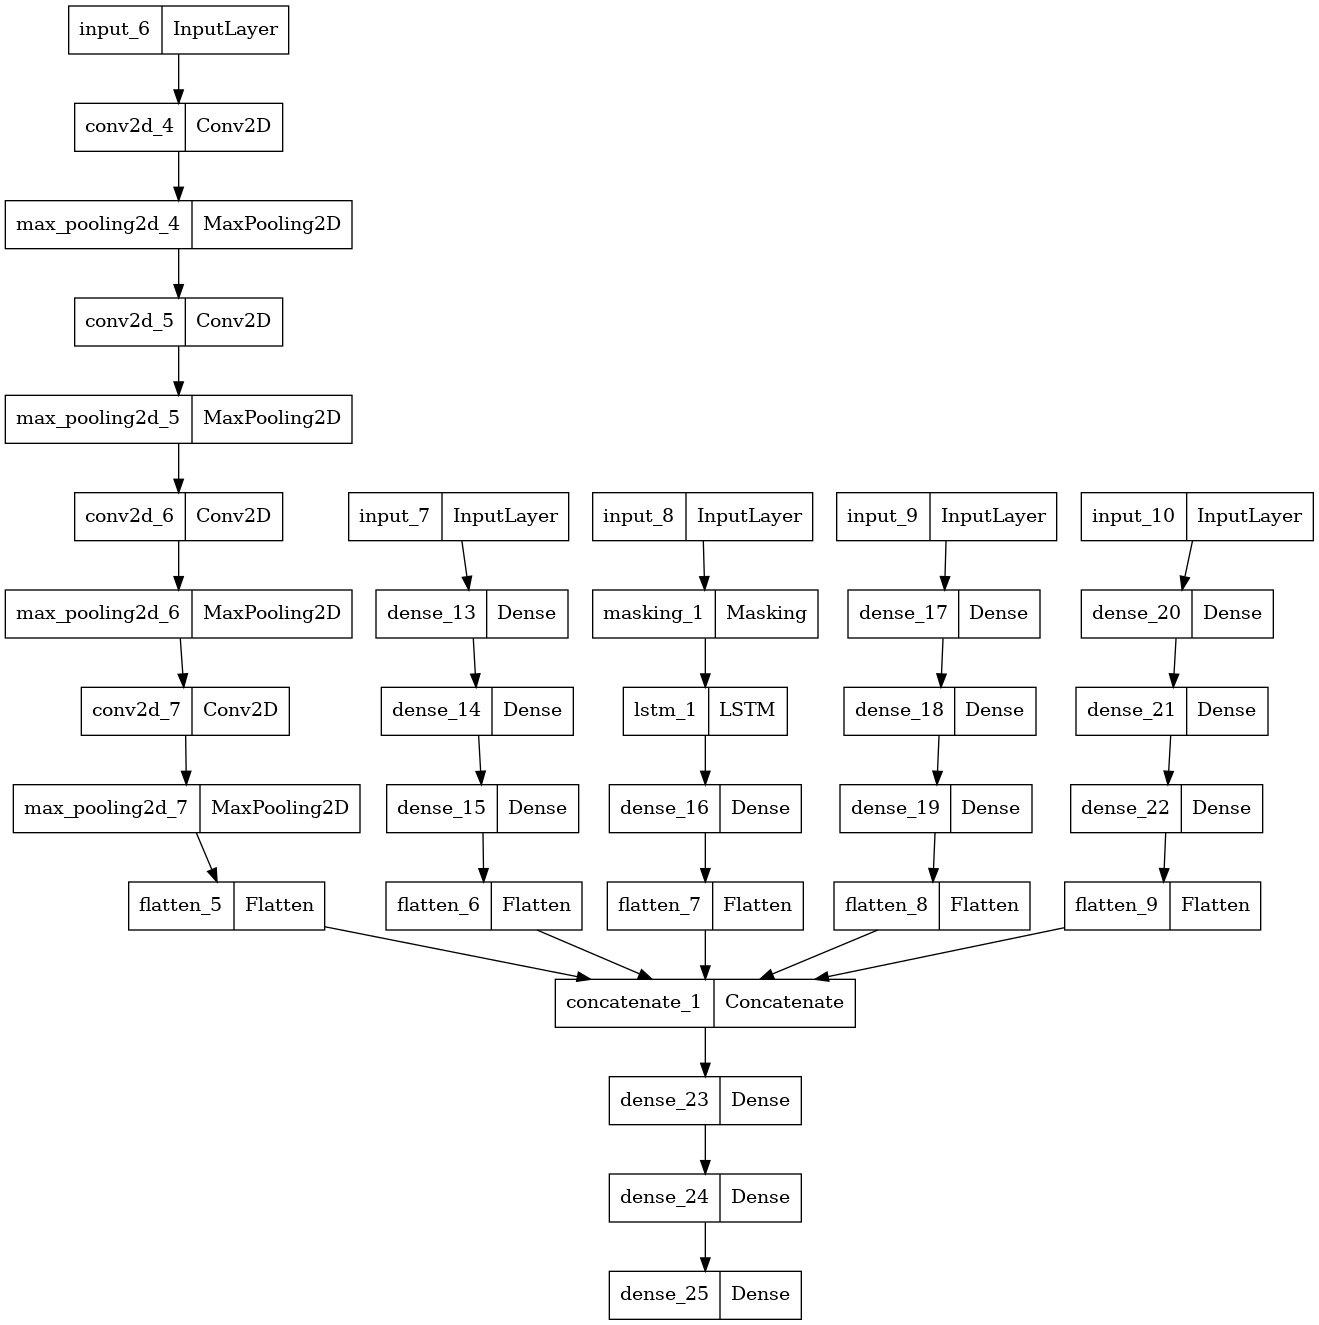

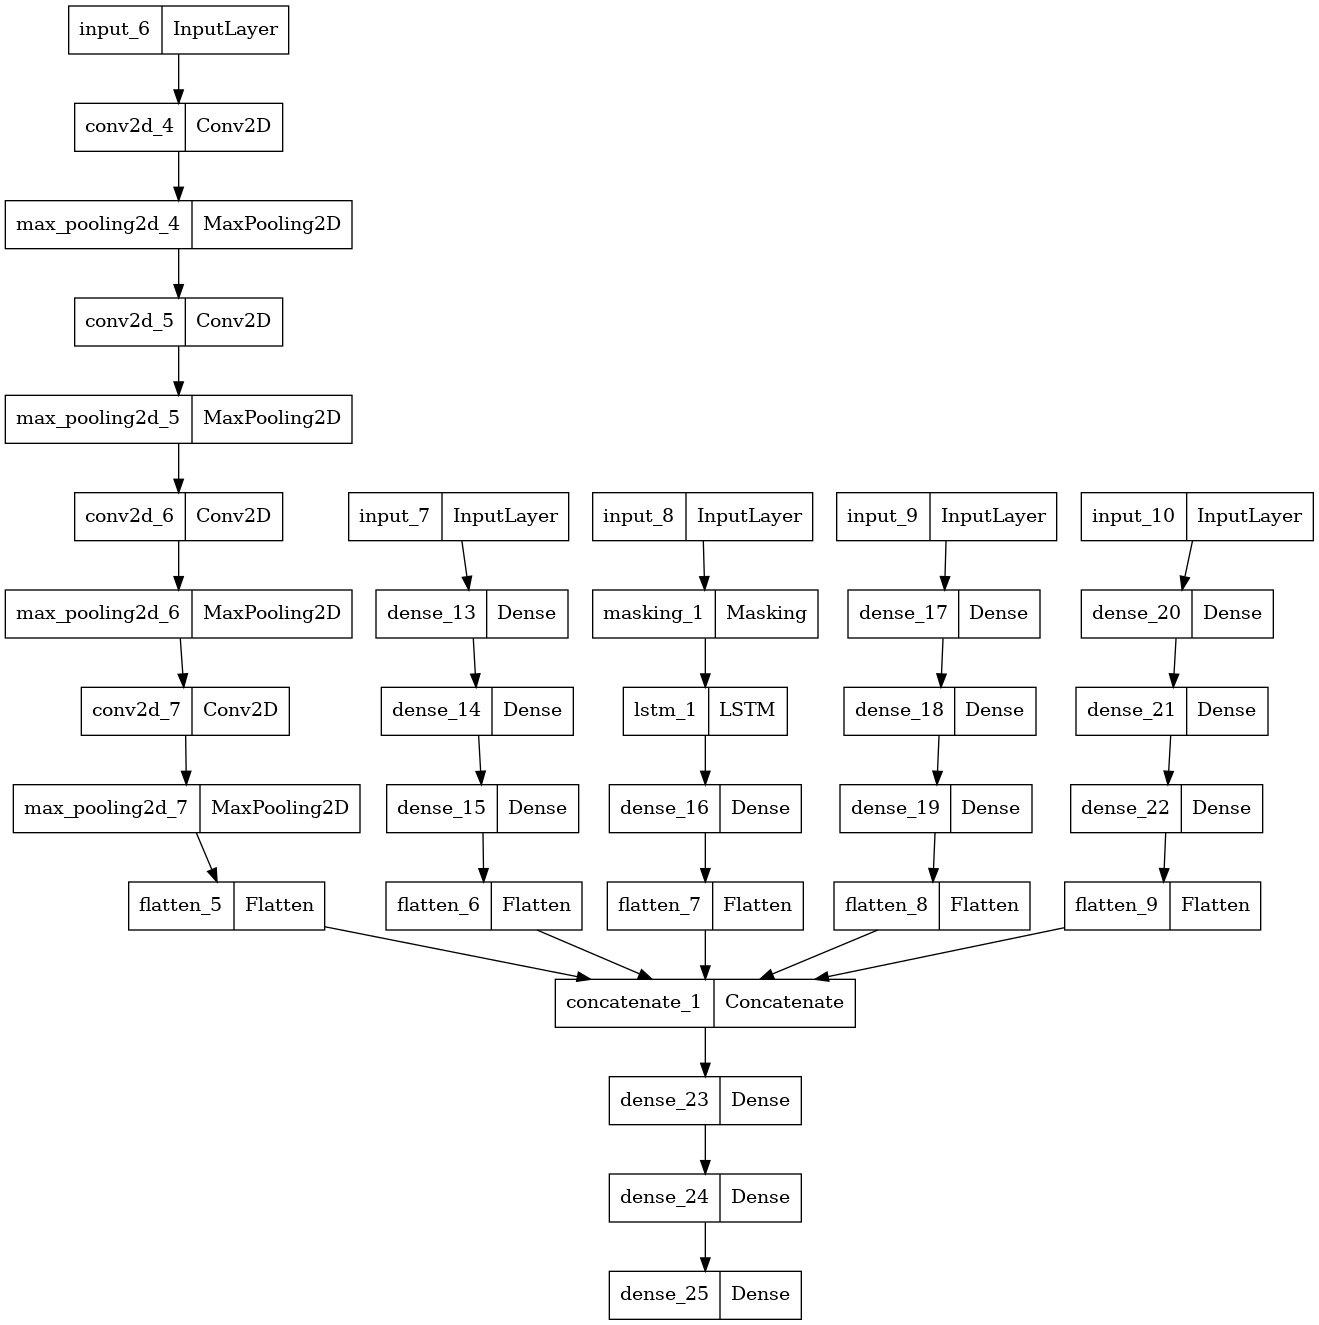

In [6]:
plot_model(model, to_file='multiple_inputs.png')